In [1]:
import perf
import pathlib
import pandas
import altair
import seaborn as sns

In [2]:

def get_items():
    for path in pathlib.Path('.').glob("*.json"):
        try:
            _, reduced = path.stem.split('-', 2)
        except ValueError:
            continue
        is_reduced = reduced == 'reduced'
        benchmark = perf.Benchmark.load(str(path))
        n = int(benchmark.get_name())
        for value in benchmark.get_values():
            yield {"n": n, "time": value * 1000, "reduced": is_reduced}

In [27]:
df['Improved'] = df['reduced']

In [28]:
df['Time (s)'] = df['time']

In [3]:
df = pandas.DataFrame(get_items())
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3720 entries, 0 to 3719
Data columns (total 3 columns):
n          3720 non-null int64
reduced    3720 non-null bool
time       3720 non-null float64
dtypes: bool(1), float64(1), int64(1)
memory usage: 61.8 KB


,n,reduced,time
0,1300,True,0.532437
1,1300,True,0.522613
2,1300,True,0.523476
3,1300,True,0.516255
4,1300,True,0.522023


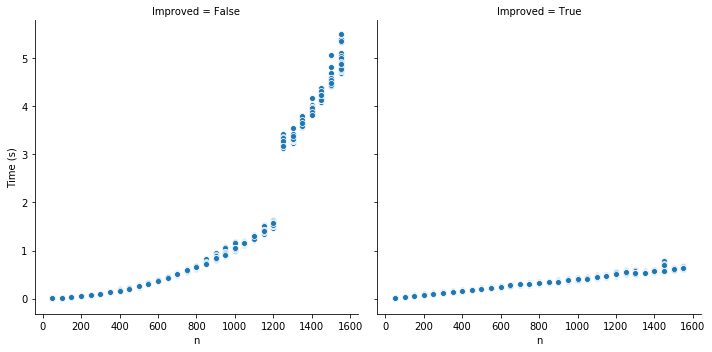

In [29]:
sns.relplot(x="n", y="Time (s)", col="Improved",
           data=df).savefig("out.png")